# Movie Ratings Visualization (In Progress)

In this project I will explore the vast movie ratings data from Metacritic, Fandango, Rotten Tomatoes, and IMDB, available at [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/fandango). The data compiles reviews from 147 films in 2015, and has nulled values for movies that have too few reviews that would sawy the ratings unfailry. Below I will analyze that data to answer the following questions:

### What is are the average comparable ratings for the first film on the dataset and what can you gather from this information?

### What kind of patterns can be gathered from the rating sources that share a comparable rating scale?

### What else can be gathred from this data?


To accomplish this I will do the following:

1. Explore the Data
2. Clean the Data
3. Analyze the Data
4. Make Conclusions from my analysis

### 1. Explore the Data

In [1]:
import pandas as pd
reviews = pd.read_csv('fandango_scores.csv')

In [2]:
reviews.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


From my initial exploration of the reviews data I can see the following:

- The ratings scale varies by site. This makes it difficult to comparatively analyze all of the data available in this dataset.
- There are 6 columns that have normalized a 0 to 5 point scale for ratings, and as a result, I will focus on the following columns to continue my comparative analysis: `FILM`, `RT_user_norm`, `Metacritic_user_nom`, `IMDB_norm`, `Fandango_Ratingvalue`, `Fandango_Stars`

### 2. Clean the Data

From my exploration of the data it appears as though the data doesn't need to be cleaned for the pupose of my analysis. I will however focus on sources with a comparable normalized point scale of 0 to 5. As a result, I will not be cleaning this data and will begin my analysis below.

### 3. Analyze the Data

In [3]:
reviews = pd.read_csv('fandango_scores.csv')
columns = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[columns]
print(norm_reviews[:1])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0        3.9                   4.5             5.0  


In [4]:
import matplotlib.pyplot as plt
from numpy import arange
columns = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[columns].iloc[0].values
bar_positions = arange(5) + 0.75

tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(columns, rotation=90)

plt.xlabel("Rating Source")
plt.ylabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

<Figure size 640x480 with 1 Axes>

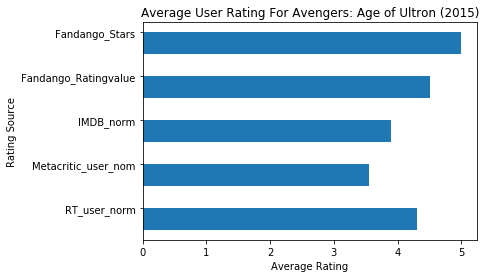

In [5]:
bar_widths = norm_reviews[columns].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(columns)

plt.ylabel("Rating Source")
plt.xlabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

From my exploration of the Average User Rating for Avengers: Age of Ultron (2015), I can see the following:

- Both Fandango reviews show higher ratings on average than those measured by the other rating sources

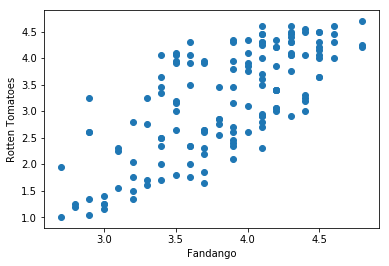

In [6]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])

ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")

plt.show()

From my exploration of Fandango and Rotten Tomatoes user reviews, I can see the following:

- There is a weak positive correlation between both rating sources

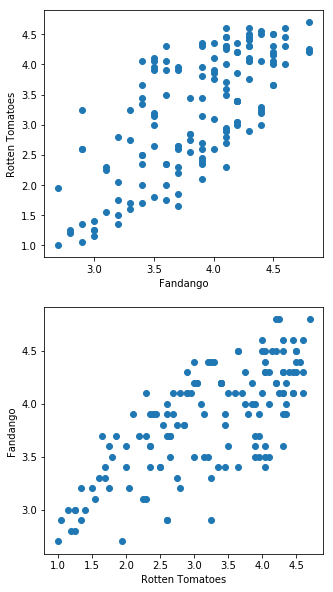

In [7]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")

ax2.scatter(norm_reviews["RT_user_norm"], norm_reviews["Fandango_Ratingvalue"])
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")

plt.show()

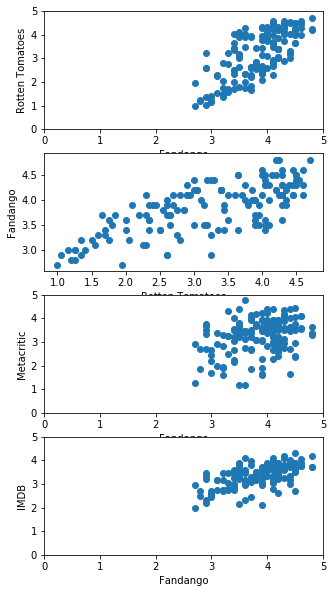

In [8]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews["RT_user_norm"], norm_reviews["Fandango_Ratingvalue"])
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax3.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["Metacritic_user_nom"])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("Metacritic")
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

ax4.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["IMDB_norm"])
ax4.set_xlabel("Fandango")
ax4.set_ylabel("IMDB")
ax4.set_xlim(0, 5)
ax4.set_ylim(0, 5)

plt.show()

From my exploration of how Fandango ratings correlate with all other rating sources user reviews, I can see the following:

- From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

- The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. In the next mission, we'll learn about two types of plots that help us understand distributions of values.

- We ended the mission with the observations that user ratings from Metacritic and Rotten Tomatoes spanned a larger range (1.0 to 5.0) while those from Fandango and IMDB spanned a smaller range (2.5 to 5 and 2 to 5 respectively).

In [9]:
fandango_distribution = reviews['Fandango_Ratingvalue'].value_counts().sort_index()

imdb_distribution = reviews['IMDB_norm'].value_counts().sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


From my exploration of the frequency of Fandango and IMDB reviews, I can see the following:

- The Fandango_Ratingvalue column ranges from 2.7 to 4.8 while the IMDB_norm column ranges from 2 to 4.3

Yet the following questions cannot be examined on the frequency plot:

- What percent of the ratings are contained in the 2.0 to 4.0 range?
    - How does this compare with other sites?
- Which values represent the top 25% of the ratings? The bottom 25%?
    - How does this compare with other sites?
    
Comparing frequency distributions is also challenging because the Fandango_Ratingvalue column contains 21 unique values while IMDB_norm contains 41 unique values. We need a way to compare frequencies across a shared set of values. They do share a normalized range of 0 to 5 and we can use this range to create a series of fixed rate intervals.

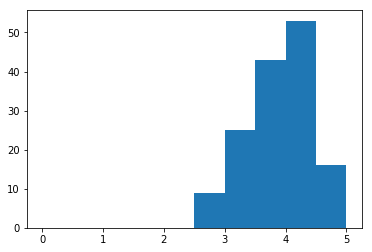

In [10]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

From my exploration of the Histogram of Fandango reviews, I can see the following:


- The proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on Fandango fall in this range. 
- As a result, I can increase the number of bins from 10 to 20 for improved resolution of the distribution. The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). The bins parameter for Axes.hist() is the 2nd positional parameter, but can also be specified as a named parameter:

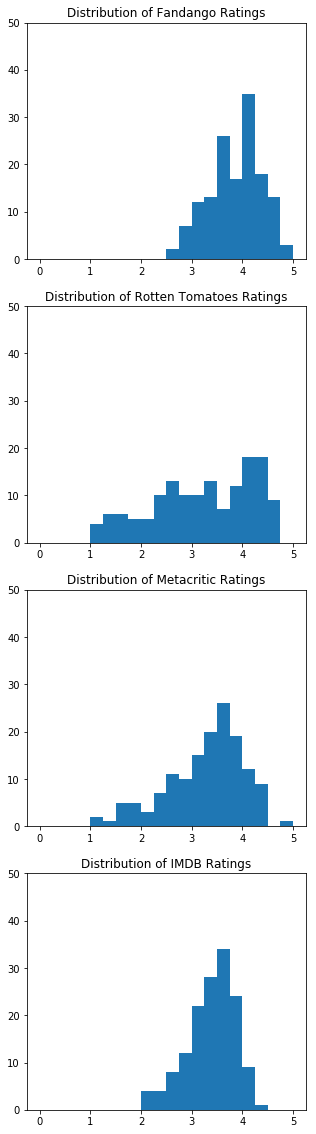

In [11]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title("Distribution of Fandango Ratings")
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0, 5))
ax2.set_title("Distribution of Rotten Tomatoes Ratings")
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0, 5))
ax3.set_title("Distribution of Metacritic Ratings")
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0, 5))
ax4.set_title("Distribution of IMDB Ratings")
ax4.set_ylim(0, 50)

plt.show()

From my exploration of the Histograms of Fandango, Rotten Tomatoes, Metacritic, and IMDB reviews, I can see the following:

- Around 50% of user ratings from Fandango fall in the 2 to 4 score range
- Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
- Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
- Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

To visualize quartiles, I will use a box plot.

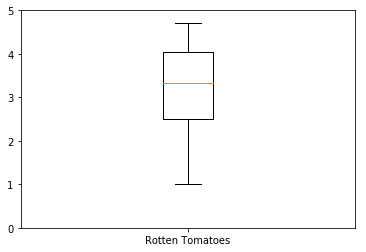

In [12]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(["Rotten Tomatoes"])
ax.set_ylim(0, 5)
plt.show()

From my exploration of the Box Plot of Rotten Tomatoes reviews, I can see the following:

- The bottom 25% of user ratings range from around 1 to 2.5
- The top 25% of of user ratings range from around 4 to 4.6

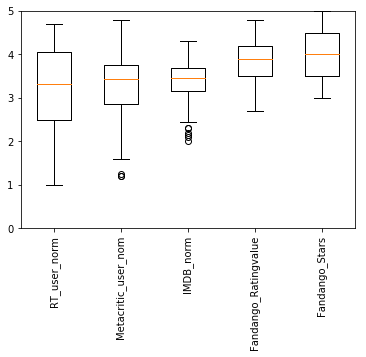

In [13]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews[columns].values)
ax.set_xticklabels(norm_reviews[columns], rotation=90)
ax.set_ylim(0, 5)
plt.show()

From my exploration of the Box Plots of Fandango, Rotten Tomatoes, Metacritic, and IMDB reviews, I can see the following:

- User ratings from Rotten Tomatoes and Metacritic span a larger range of values
- User ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values

In addition, there are a couple user ratings from both Metacritic and IMDB qualify as outliers .

### Conclusion